In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [19]:
# Load the dataset
dataset_path = "/content/water_potability.csv"
df = pd.read_csv(dataset_path)

In [20]:
# Data Preprocessing: Handling missing values
df.fillna(df.mean(), inplace=True)

In [21]:
# Splitting features and target
X = df.drop(columns=["Potability"])
y = df["Potability"]

In [22]:
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Splitting data into training (70%), validation (15%), and testing (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [24]:
# Building a Neural Network model with Batch Normalization, L2 Regularization, and Adam Optimizer
def build_model():
    model = keras.Sequential([
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
        layers.BatchNormalization(),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
        layers.BatchNormalization(),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),  # Adam optimizer
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [25]:
# Instantiate and train the model
model = build_model()
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=[early_stopping])


Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5794 - loss: 1.2012 - val_accuracy: 0.6721 - val_loss: 0.8199
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6477 - loss: 0.7810 - val_accuracy: 0.6334 - val_loss: 0.7128
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6436 - loss: 0.7044 - val_accuracy: 0.6660 - val_loss: 0.6959
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6474 - loss: 0.6878 - val_accuracy: 0.6721 - val_loss: 0.6738
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6413 - loss: 0.6956 - val_accuracy: 0.6640 - val_loss: 0.6808
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6636 - loss: 0.6714 - val_accuracy: 0.6823 - val_loss: 0.6661
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6402 - loss: 0.6874 - val_accuracy: 0.6762 - val_loss: 0.6533
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6507 - loss: 0.6822 - val_accuracy: 0.6945 - val_loss:

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Model Predictions
y_pred_probs = model.predict(X_test)  # Get probability scores
y_pred = (y_pred_probs > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print Results
print("Model Performance Report:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Model Performance Report:
Accuracy: 0.6748
Precision: 0.6543
Recall: 0.2865
F1 Score: 0.3985

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.91      0.78       307
           1       0.65      0.29      0.40       185

    accuracy                           0.67       492
   macro avg       0.67      0.60      0.59       492
weighted avg       0.67      0.67      0.63       492


Confusion Matrix:
 [[279  28]
 [132  53]]


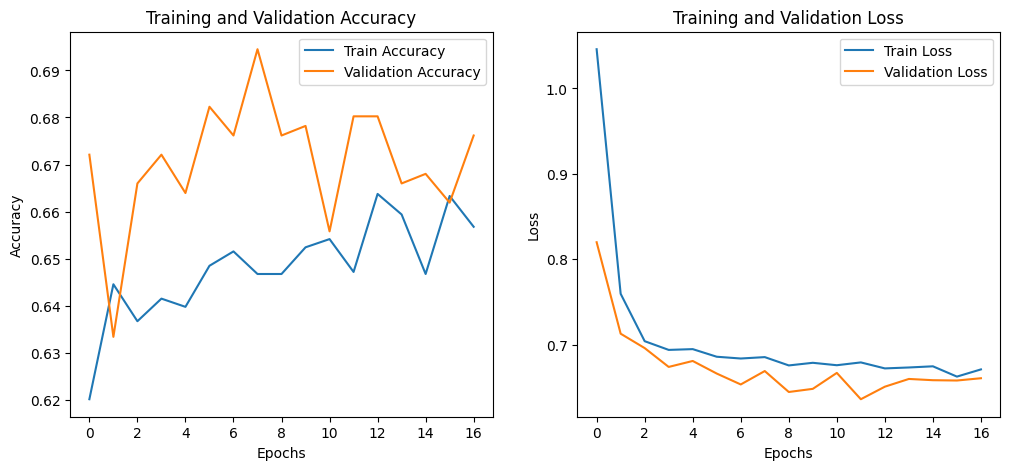

In [27]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()